In [39]:
import importlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import random
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from utils import data_manage_utils
from utils import train_utils

importlib.reload(train_utils)
importlib.reload(data_manage_utils)

<module 'utils.data_manage_utils' from 'C:\\Users\\chrig\\OneDrive - Johannes Kepler Universität Linz (1)\\Masterarbeit\\PythonWorkspace\\utils\\data_manage_utils.py'>

In [40]:
pert_result_path = "./pert_output/RF/2023_06_22-0057/"
data_path = "B"
pert_result_df_path = pert_result_path + "pert_out_df.pkl"
pert_result_model_path = pert_result_path + "model_path.txt"
with open(pert_result_model_path,'r') as file:
    model_path = file.read().rstrip()

pert_df = pd.read_pickle(pert_result_df_path)

pert_cols = list(set(pert_df.columns) - {"ARR_MIN_OF_DAY_COS", "ARR_MIN_OF_DAY_SIN", "ARR_DAY_SIN", "ARR_DAY_COS"})
USE_TH = False
if USE_TH:
    pert_cols = ["TEMP(C)","WIND_SPEED(KMH)","REL_HUMIDITY(PERCENT)","WIND_DRCT(DEG)", "SEA_LEVEL_PRESSURE(MILLIBAR)"]

pert_df

,CRS_ELAPSED_TIME(MINS),NR_PREV_ARR_FLIGHTS(1HR),ARR_DAY_SIN,ARR_DAY_COS,ARR_MIN_OF_DAY_SIN,ARR_MIN_OF_DAY_COS,DEP_DELAY(MINS),MTOW(KG),WINGLETS(YN),TEMP(C),...,EVENT_SN,EVENT_TS,08L/26R,08R/26L,09L/27R,09R/27L,10/28,y_true,pert_id,y
0,124,40,0.781831,0.623490,0.177944,-0.984041,-1,206384.360000,0,7.222222,...,0,0,3.0,0.0,0.0,0.0,3.0,1,TEMP(C)<6061862>,1
1,124,40,0.781831,0.623490,0.177944,-0.984041,-1,206384.360000,0,7.212222,...,0,0,3.0,0.0,0.0,0.0,3.0,1,TEMP(C)<6061862>,1
2,124,40,0.781831,0.623490,0.177944,-0.984041,-1,206384.360000,0,7.232222,...,0,0,3.0,0.0,0.0,0.0,3.0,1,TEMP(C)<6061862>,1
3,124,40,0.781831,0.623490,0.177944,-0.984041,-1,206384.360000,0,7.202222,...,0,0,3.0,0.0,0.0,0.0,3.0,1,TEMP(C)<6061862>,1
4,124,40,0.781831,0.623490,0.177944,-0.984041,-1,206384.360000,0,7.242222,...,0,0,3.0,0.0,0.0,0.0,3.0,1,TEMP(C)<6061862>,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12982637,95,48,-0.781831,0.623490,-0.779884,-0.625923,-3,122469.840000,0,9.388889,...,0,0,1.0,1.0,1.0,1.0,2.0,0,DEP_DELAY(MINS)<10662784>,0
12982638,208,3,-0.433884,-0.900969,0.999962,0.008727,6,93499.826144,1,12.222222,...,0,0,1.0,3.0,1.0,2.0,1.0,1,DEP_DELAY(MINS)<7487982>,1
12982639,110,79,-0.781831,0.623490,-0.953717,0.300706,9,79015.726400,0,25.000000,...,0,0,1.0,1.0,3.0,3.0,1.0,1,DEP_DELAY(MINS)<6871465>,1
12982640,119,66,0.433884,-0.900969,-0.970296,-0.241922,-6,79015.726400,0,29.388889,...,0,0,2.0,0.0,3.0,3.0,2.0,0,DEP_DELAY(MINS)<9317074>,0


In [41]:
y_test_pred = pd.read_pickle("./../training/training_results/" + model_path + "y_test_pred.pkl")
y_test_true = pd.read_pickle("./../training/processed_files/"+data_path+"/y_test_df.pkl")
y_test_pred

,y_pred_test_rf
0,1
1,0
2,0
3,1
4,0
...,...
69623,0
69624,1
69625,1
69626,0


In [42]:
X_test = pd.read_pickle("./../training/processed_files/"+data_path+"/X_test_df.pkl")
y_test = pd.read_pickle("./../training/processed_files/"+data_path+"/y_test_df.pkl")
X_test

,CRS_ELAPSED_TIME(MINS),NR_PREV_ARR_FLIGHTS(1HR),ARR_DAY_SIN,ARR_DAY_COS,ARR_MIN_OF_DAY_SIN,ARR_MIN_OF_DAY_COS,DEP_DELAY(MINS),MTOW(KG),WINGLETS(YN),TEMP(C),...,EVENT_FG,EVENT_IC,EVENT_RA,EVENT_SN,EVENT_TS,08L/26R,08R/26L,09L/27R,09R/27L,10/28
6061862,124,40,0.781831,0.623490,0.177944,-0.984041,-1,206384.360000,0,7.222222,...,0,0,0,0,0,3.0,0.0,0.0,0.0,3.0
6567004,112,80,0.000000,1.000000,0.716302,-0.697790,-3,206384.360000,0,13.888889,...,0,0,1,0,0,0.0,3.0,2.0,3.0,3.0
5668759,61,57,0.974928,-0.222521,-0.573576,-0.819152,-7,21522.940400,1,10.611111,...,0,0,0,0,0,0.0,3.0,0.0,0.0,3.0
7953069,171,65,-0.433884,-0.900969,-0.975342,0.220697,0,93499.826144,1,29.388889,...,0,0,0,0,0,0.0,3.0,0.0,3.0,3.0
11204574,125,55,0.781831,0.623490,-0.500000,0.866025,-5,79015.726400,0,7.222222,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10662784,95,48,-0.781831,0.623490,-0.779884,-0.625923,-3,122469.840000,0,9.388889,...,0,0,0,0,0,1.0,1.0,1.0,1.0,2.0
7487982,208,3,-0.433884,-0.900969,0.999962,0.008727,6,93499.826144,1,12.222222,...,0,0,0,0,0,1.0,3.0,1.0,2.0,1.0
6871465,110,79,-0.781831,0.623490,-0.953717,0.300706,9,79015.726400,0,25.000000,...,0,0,0,0,0,1.0,1.0,3.0,3.0,1.0
9317074,119,66,0.433884,-0.900969,-0.970296,-0.241922,-6,79015.726400,0,29.388889,...,0,0,0,0,0,2.0,0.0,3.0,3.0,2.0


[Text(0, 0, '19966'), Text(0, 0, '42039'), Text(0, 0, '7623')]

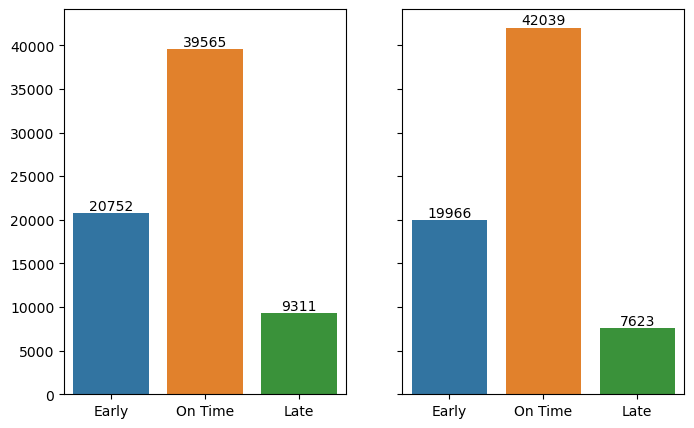

In [43]:
fig, axes = plt.subplots(1,2,figsize=(8,5), sharey=True)
sns.barplot(x=["Early", "On Time", "Late"], y=list(y_test_true.value_counts().sort_index()), ax=axes[0])
sns.barplot(x=["Early", "On Time", "Late"], y=list(y_test_pred.value_counts().sort_index()), ax=axes[1])
axes[0].bar_label(axes[0].containers[0])
axes[1].bar_label(axes[1].containers[0])

In [44]:
def print_measures(y_pred, y_true, true_labels):
    if type(y_pred) == pd.DataFrame:
        y_pred = y_pred[y_pred.columns[0]]
    if type(y_true) == pd.DataFrame:
        y_true = y_true[y_true.columns[0]]
    ret_dict = {}
    print(20*"-")
    print(f"Global measures")
    print(f"Number of entries: {len(y_pred)}")
    acc = accuracy_score(y_true=y_true, y_pred=y_pred, normalize=True)
    ret_dict.update({"acc" : acc})
    print(f"Accuracy: {acc:.5f}")
    print(f"Precision-µ: {precision_score(y_true=y_true, y_pred=y_pred, average='micro'):.5f}")
    print(f"Recall-µ: {recall_score(y_true=y_true, y_pred=y_pred, average='micro'):.5f}")
    print(f"F1-Score-µ: {f1_score(y_true=y_true, y_pred=y_pred, average='micro'):.5f}")
    print("=")
    print(f"Precision-M: {precision_score(y_true=y_true, y_pred=y_pred, average='macro'):.5f}")
    print(f"Recall-M: {recall_score(y_true=y_true, y_pred=y_pred, average='macro'):.5f}")
    print(f"F1-Score-M: {f1_score(y_true=y_true, y_pred=y_pred, average='macro'):.5f}")
    for label in true_labels:
        if (label in y_pred) or (label in y_true):
            y_pred_filtered = [1 if val == label else 0 for val in y_pred]
            y_true_filtered = [1 if val == label else 0 for val in y_true]
            print(20*"-")
            print(f"Measures for label '{label}'")
            print(f"Number of entries: {sum(y_true_filtered)}")
            prec = precision_score(y_true=y_true_filtered, y_pred=y_pred_filtered)
            print(f"Precision score: {prec:.5f}")
            print(f"Recall score: {recall_score(y_true=y_true_filtered, y_pred=y_pred_filtered):.5f}")
            ret_dict.update({"prec"+str(label) : prec})
    return ret_dict
real = print_measures(y_test_pred, y_test_true, [0,1,2])

--------------------
Global measures
Number of entries: 69628
Accuracy: 0.72518
Precision-µ: 0.72518
Recall-µ: 0.72518
F1-Score-µ: 0.72518
=
Precision-M: 0.75234
Recall-M: 0.70611
F1-Score-M: 0.72622
--------------------
Measures for label '0'
Number of entries: 20752
Precision score: 0.61935
Recall score: 0.59589
--------------------
Measures for label '1'
Number of entries: 39565
Precision score: 0.74509
Recall score: 0.79168
--------------------
Measures for label '2'
Number of entries: 9311
Precision score: 0.89256
Recall score: 0.73075


In [45]:
X_pert_res = pert_df.groupby("pert_id").agg({'y':['min','max']})["y"]
X_pert_res

,min,max
pert_id,,
08L/26R<10000852>,1,1
08L/26R<10001243>,1,1
08L/26R<10002013>,1,1
08L/26R<10002279>,1,1
08L/26R<10002831>,1,1
...,...,...
WINGLETS(YN)<9998419>,1,1
WINGLETS(YN)<9998422>,1,1
WINGLETS(YN)<9998464>,1,1


In [46]:
pert_alerts = X_pert_res[~(X_pert_res["min"] == X_pert_res["max"])]
pert_alerts

,min,max
pert_id,,
08L/26R<10043024>,1,2
08L/26R<10043249>,0,1
08L/26R<10055473>,0,1
08L/26R<10056096>,0,1
08L/26R<10072520>,0,1
...,...,...
WINGLETS(YN)<9989255>,0,1
WINGLETS(YN)<9995063>,0,1
WINGLETS(YN)<9996594>,0,1


In [47]:
list(pert_alerts.index)
pert_df[pert_df["pert_id"].isin(list(pert_alerts.index))]

,CRS_ELAPSED_TIME(MINS),NR_PREV_ARR_FLIGHTS(1HR),ARR_DAY_SIN,ARR_DAY_COS,ARR_MIN_OF_DAY_SIN,ARR_MIN_OF_DAY_COS,DEP_DELAY(MINS),MTOW(KG),WINGLETS(YN),TEMP(C),...,EVENT_SN,EVENT_TS,08L/26R,08R/26L,09L/27R,09R/27L,10/28,y_true,pert_id,y
25916,97,71,-0.781831,0.62349,0.548293,-0.836286,-5,21522.9404,1,23.277778,...,0,0,0.0,0.0,0.0,0.0,0.0,1,TEMP(C)<9254849>,1
25917,97,71,-0.781831,0.62349,0.548293,-0.836286,-5,21522.9404,1,23.267778,...,0,0,0.0,0.0,0.0,0.0,0.0,1,TEMP(C)<9254849>,1
25918,97,71,-0.781831,0.62349,0.548293,-0.836286,-5,21522.9404,1,23.287778,...,0,0,0.0,0.0,0.0,0.0,0.0,1,TEMP(C)<9254849>,1
25919,97,71,-0.781831,0.62349,0.548293,-0.836286,-5,21522.9404,1,23.257778,...,0,0,0.0,0.0,0.0,0.0,0.0,1,TEMP(C)<9254849>,1
25920,97,71,-0.781831,0.62349,0.548293,-0.836286,-5,21522.9404,1,23.297778,...,0,0,0.0,0.0,0.0,0.0,0.0,1,TEMP(C)<9254849>,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12840619,101,97,0.781831,0.62349,0.540974,-0.841039,-9,21522.9404,1,-0.611111,...,0,0,2.0,0.0,0.0,0.0,0.0,1,SEA_LEVEL_PRESSURE(MILLIBAR)<11210762>,0
12840620,101,97,0.781831,0.62349,0.540974,-0.841039,-9,21522.9404,1,-0.611111,...,0,0,2.0,0.0,0.0,0.0,0.0,1,SEA_LEVEL_PRESSURE(MILLIBAR)<11210762>,1
12840621,101,97,0.781831,0.62349,0.540974,-0.841039,-9,21522.9404,1,-0.611111,...,0,0,2.0,0.0,0.0,0.0,0.0,1,SEA_LEVEL_PRESSURE(MILLIBAR)<11210762>,0
12840622,101,97,0.781831,0.62349,0.540974,-0.841039,-9,21522.9404,1,-0.611111,...,0,0,2.0,0.0,0.0,0.0,0.0,1,SEA_LEVEL_PRESSURE(MILLIBAR)<11210762>,1


In [48]:
pert_outcomes = pert_df[pert_df.columns[-3:]]
pert_outcomes

,y_true,pert_id,y
0,1,TEMP(C)<6061862>,1
1,1,TEMP(C)<6061862>,1
2,1,TEMP(C)<6061862>,1
3,1,TEMP(C)<6061862>,1
4,1,TEMP(C)<6061862>,1
...,...,...,...
12982637,0,DEP_DELAY(MINS)<10662784>,0
12982638,1,DEP_DELAY(MINS)<7487982>,1
12982639,1,DEP_DELAY(MINS)<6871465>,1
12982640,0,DEP_DELAY(MINS)<9317074>,0


In [49]:
def disassemble_pert_id(row):
    s = row["pert_id"].split("<")
    col = s[0]
    idx = s[1][:-1]
    val = row[col]
    return [col,val,idx]

col_values = pert_df.apply(lambda row: disassemble_pert_id(row), axis=1)

In [50]:
col_values = pd.DataFrame(list(col_values.to_numpy()), columns=["column","val","idx"])
col_values

,column,val,idx
0,TEMP(C),7.222222,6061862
1,TEMP(C),7.212222,6061862
2,TEMP(C),7.232222,6061862
3,TEMP(C),7.202222,6061862
4,TEMP(C),7.242222,6061862
...,...,...,...
12982637,DEP_DELAY(MINS),-3.000000,10662784
12982638,DEP_DELAY(MINS),6.000000,7487982
12982639,DEP_DELAY(MINS),9.000000,6871465
12982640,DEP_DELAY(MINS),-6.000000,9317074


In [51]:
col_values[col_values["column"] == "REL_HUMIDITY(PERCENT)"]

,column,val,idx
2645864,REL_HUMIDITY(PERCENT),73.37000,6061862
2645865,REL_HUMIDITY(PERCENT),73.00315,6061862
2645866,REL_HUMIDITY(PERCENT),73.73685,6061862
2645867,REL_HUMIDITY(PERCENT),72.63630,6061862
2645868,REL_HUMIDITY(PERCENT),74.10370,6061862
...,...,...,...
3968791,REL_HUMIDITY(PERCENT),55.09305,5855873
3968792,REL_HUMIDITY(PERCENT),51.10080,5855873
3968793,REL_HUMIDITY(PERCENT),55.35920,5855873
3968794,REL_HUMIDITY(PERCENT),50.83465,5855873


In [52]:
pert_outcomes["column"] = list(col_values["column"])
pert_outcomes["val"] = list(col_values["val"])
pert_outcomes["idx"] = list(col_values["idx"])
pert_outcomes

C:\Users\chrig\AppData\Local\Temp\ipykernel_14976\1567013798.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pert_outcomes["column"] = list(col_values["column"])
C:\Users\chrig\AppData\Local\Temp\ipykernel_14976\1567013798.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pert_outcomes["val"] = list(col_values["val"])
C:\Users\chrig\AppData\Local\Temp\ipykernel_14976\1567013798.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

,y_true,pert_id,y,column,val,idx
0,1,TEMP(C)<6061862>,1,TEMP(C),7.222222,6061862
1,1,TEMP(C)<6061862>,1,TEMP(C),7.212222,6061862
2,1,TEMP(C)<6061862>,1,TEMP(C),7.232222,6061862
3,1,TEMP(C)<6061862>,1,TEMP(C),7.202222,6061862
4,1,TEMP(C)<6061862>,1,TEMP(C),7.242222,6061862
...,...,...,...,...,...,...
12982637,0,DEP_DELAY(MINS)<10662784>,0,DEP_DELAY(MINS),-3.000000,10662784
12982638,1,DEP_DELAY(MINS)<7487982>,1,DEP_DELAY(MINS),6.000000,7487982
12982639,1,DEP_DELAY(MINS)<6871465>,1,DEP_DELAY(MINS),9.000000,6871465
12982640,0,DEP_DELAY(MINS)<9317074>,0,DEP_DELAY(MINS),-6.000000,9317074


In [53]:
pert_view = pert_outcomes.groupby(["pert_id","y_true"]).first().reset_index().set_index('pert_id')
pert_view

,y_true,y,column,val,idx
pert_id,,,,,
08L/26R<10000852>,0,1,08L/26R,3.0,10000852
08L/26R<10001243>,1,1,08L/26R,3.0,10001243
08L/26R<10002013>,1,1,08L/26R,3.0,10002013
08L/26R<10002279>,1,1,08L/26R,1.0,10002279
08L/26R<10002831>,0,1,08L/26R,1.0,10002831
...,...,...,...,...,...
WINGLETS(YN)<9998419>,1,1,WINGLETS(YN),0.0,9998419
WINGLETS(YN)<9998422>,1,1,WINGLETS(YN),1.0,9998422
WINGLETS(YN)<9998464>,1,1,WINGLETS(YN),0.0,9998464


In [54]:
if USE_TH:
    pert_view = pert_view[list(pert_view["column"].isin(pert_cols))]

In [55]:
pert_view["pert_alarm"] = [idx in pert_alerts.index for idx in pert_view.index]
faulty = pert_view[pert_view["y_true"] != pert_view["y"]]
faulty_and_changed = faulty[faulty["pert_alarm"]]
pert_view["class_error"] = [idx in faulty.index for idx in pert_view.index]
pert_view

,y_true,y,column,val,idx,pert_alarm,class_error
pert_id,,,,,,,
08L/26R<10000852>,0,1,08L/26R,3.0,10000852,False,True
08L/26R<10001243>,1,1,08L/26R,3.0,10001243,False,False
08L/26R<10002013>,1,1,08L/26R,3.0,10002013,False,False
08L/26R<10002279>,1,1,08L/26R,1.0,10002279,False,False
08L/26R<10002831>,0,1,08L/26R,1.0,10002831,False,True
...,...,...,...,...,...,...,...
WINGLETS(YN)<9998419>,1,1,WINGLETS(YN),0.0,9998419,False,False
WINGLETS(YN)<9998422>,1,1,WINGLETS(YN),1.0,9998422,False,False
WINGLETS(YN)<9998464>,1,1,WINGLETS(YN),0.0,9998464,False,False


In [56]:
print(f"Wrong classification records for all perturbation options: {(len(pert_view[pert_view['class_error']])/len(pert_view))*100:.3f}%")
print(f"# of perturbation alarms for all perturbation options: {(len(pert_view[pert_view['pert_alarm']])/len(pert_view))*100:.3f}%")
print(f"Alarmed perturbation options that were wrongly classified: {(len(pert_view[pert_view['pert_alarm'] & pert_view['class_error']])/len(pert_view[pert_view['pert_alarm']]))*100:.3f}%")
print(f"Percentage of wrong classifications that were alarmed: {(len(pert_view[pert_view['pert_alarm'] & pert_view['class_error']])/len(pert_view[pert_view['class_error']]))*100:.3f}%")
print(f"Percentage of correct classifications that were alarmed: {(len(pert_view[pert_view['pert_alarm'] & pert_view['class_error']])/len(pert_view[pert_view['class_error'] == False]))*100:.3f}%")
print(f"Percentage of not alarmed options that were wrongly classified: {(len(pert_view[pert_view['class_error']])/len(pert_view[pert_view['pert_alarm'] == False]))*100:.3f}%")

Wrong classification records for all perturbation options: 27.482%
# of perturbation alarms for all perturbation options: 2.413%
Alarmed perturbation options that were wrongly classified: 48.288%
Percentage of wrong classifications that were alarmed: 4.239%
Percentage of correct classifications that were alarmed: 1.607%
Percentage of not alarmed options that were wrongly classified: 28.161%


In [57]:
cols = list(pert_view["column"].value_counts().index)
cols

['08L/26R',
 'EVENT_SN',
 'WIND_SPEED(KMH)',
 'WIND_DRCT(DEG)',
 'VISIBILITY(MILES)',
 'TEMP(C)',
 'SEA_LEVEL_PRESSURE(MILLIBAR)',
 'REL_HUMIDITY(PERCENT)',
 'NR_PREV_ARR_FLIGHTS(1HR)',
 'MTOW(KG)',
 'EVENT_TS',
 'EVENT_RA',
 '08R/26L',
 'EVENT_IC',
 'EVENT_FG',
 'EVENT_DZ',
 'EVENT_BR',
 'DEP_DELAY(MINS)',
 'CRS_ELAPSED_TIME(MINS)',
 '10/28',
 '09R/27L',
 '09L/27R',
 'WINGLETS(YN)']

C:\Users\chrig\anaconda3\envs\ma-env39\lib\site-packages\seaborn\distributions.py:269: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  baselines.iloc[:, cols] = (curves
C:\Users\chrig\anaconda3\envs\ma-env39\lib\site-packages\seaborn\distributions.py:269: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  baselines.iloc[:, cols] = (curves
C:\Users\chrig\anaconda3\envs\ma-env39\lib\site-packages\seaborn\distributions.py:269: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new ar

,y_true,y,column,val,pert_alarm,class_error
idx,,,,,,
10000852,0,1,08L/26R,3.0,False,True
10001243,1,1,08L/26R,3.0,False,False
10002013,1,1,08L/26R,3.0,False,False
10002279,1,1,08L/26R,1.0,False,False
10002831,0,1,08L/26R,1.0,False,True
...,...,...,...,...,...,...
9998419,1,1,08L/26R,3.0,False,False
9998422,1,1,08L/26R,3.0,False,False
9998464,1,1,08L/26R,3.0,False,False


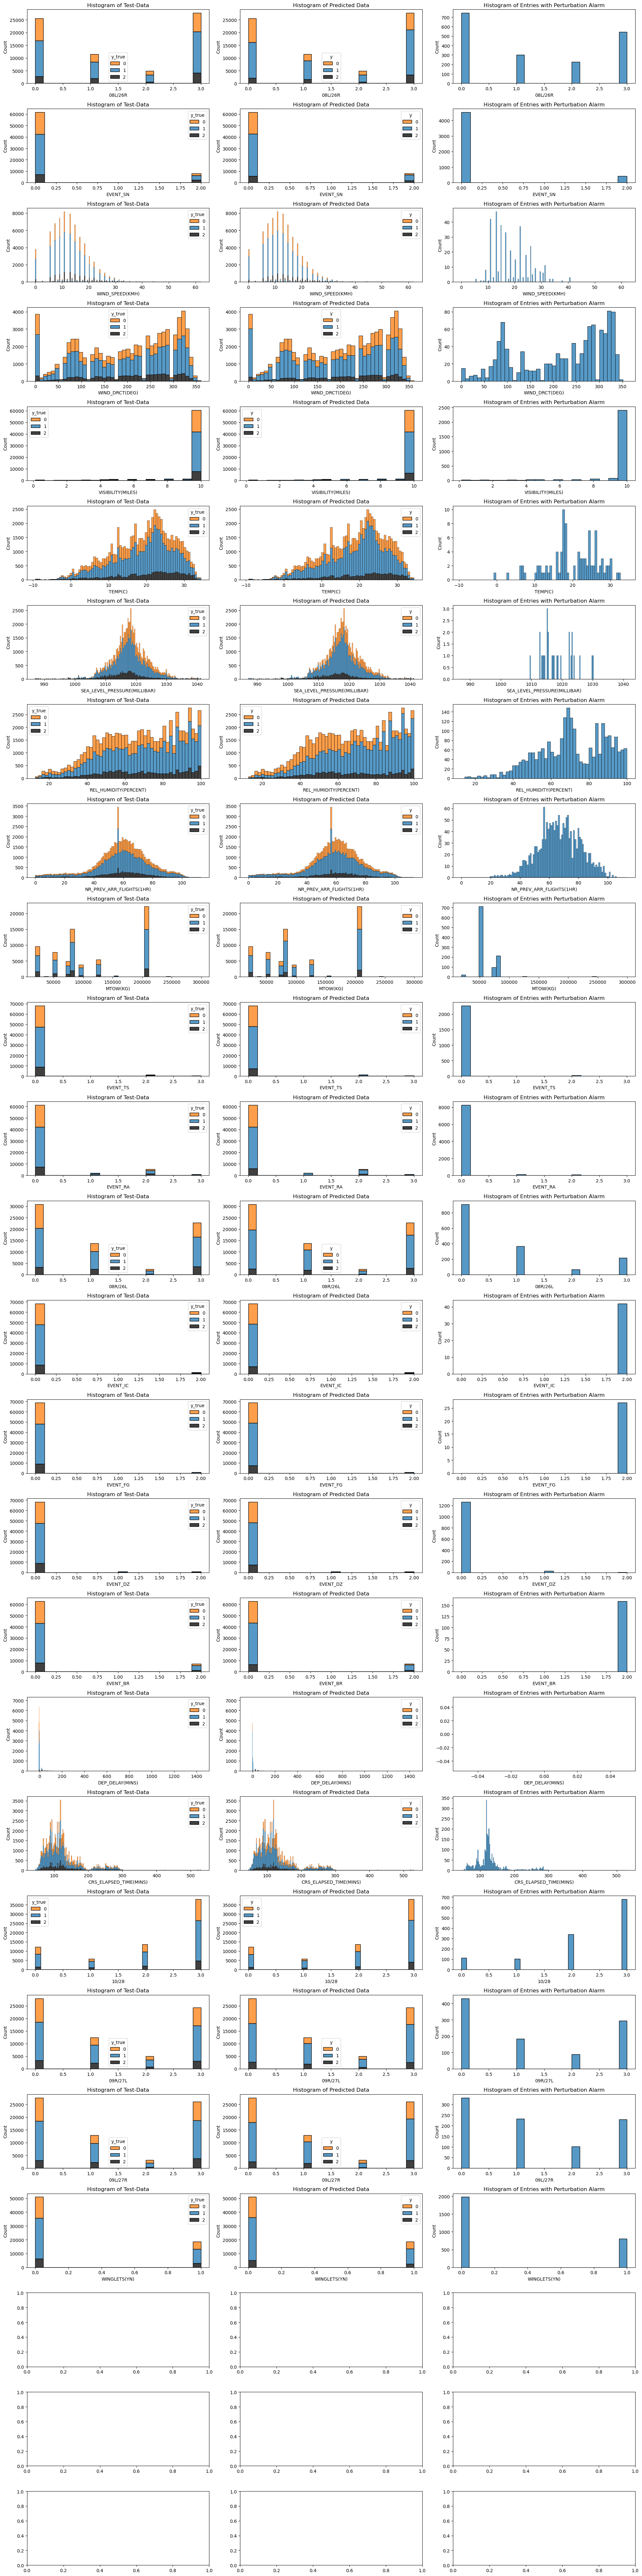

In [58]:
pert_view_alert = pert_view[pert_view["pert_alarm"] == True]

fig, axes = plt.subplots(len(pert_cols),3, figsize=(20,80))

count = 0
for col in cols:
    p_row = int(count / 3)
    bins = np.histogram_bin_edges(pert_view[pert_view["column"] == col]["val"], bins='auto')
    ax = sns.histplot(data = pert_view[pert_view["column"] == col], x = "val", hue="y_true", multiple="stack", ax=axes[p_row][0], bins=bins, palette = ["C1", "C0", "k"])
    axes[p_row][0].set_title("Histogram of Test-Data")
    ax.set(xlabel=col)
    ax = sns.histplot(data = pert_view[pert_view["column"] == col], x = "val", hue="y", multiple="stack", ax=axes[p_row][1], bins=bins, palette = ["C1", "C0", "k"])
    axes[p_row][1].set_title("Histogram of Predicted Data")
    ax.set(xlabel=col)
    ax = sns.histplot(data = pert_view_alert[pert_view_alert["column"] == col], x = "val", multiple="stack", ax=axes[p_row][2], bins = bins)
    axes[p_row][2].set_title("Histogram of Entries with Perturbation Alarm")
    ax.set(xlabel=col)
    count += 3
fig.tight_layout()
pert_view.groupby("idx").first()

In [59]:
def to_set(x):

    return set(x)

pert_view["y_outcomes"] = list(pert_outcomes[["pert_id" , "y"]].groupby("pert_id")["y"].apply(set).reset_index()["y"].to_numpy())
pert_view

,y_true,y,column,val,idx,pert_alarm,class_error,y_outcomes
pert_id,,,,,,,,
08L/26R<10000852>,0,1,08L/26R,3.0,10000852,False,True,{1}
08L/26R<10001243>,1,1,08L/26R,3.0,10001243,False,False,{1}
08L/26R<10002013>,1,1,08L/26R,3.0,10002013,False,False,{1}
08L/26R<10002279>,1,1,08L/26R,1.0,10002279,False,False,{1}
08L/26R<10002831>,0,1,08L/26R,1.0,10002831,False,True,{1}
...,...,...,...,...,...,...,...,...
WINGLETS(YN)<9998419>,1,1,WINGLETS(YN),0.0,9998419,False,False,{1}
WINGLETS(YN)<9998422>,1,1,WINGLETS(YN),1.0,9998422,False,False,{1}
WINGLETS(YN)<9998464>,1,1,WINGLETS(YN),0.0,9998464,False,False,{1}


In [60]:
def find_diff(x):
    return list(x.y_outcomes.difference({x.y}))

pert_view["changed_to"] = pert_view.apply( find_diff , axis = "columns")

In [61]:
def is_good_change(x):
    return x.y_true in x.changed_to

pert_view["corrected"] = list(pert_view[["y_true", "changed_to"]].apply(is_good_change, axis = "columns"))

In [62]:
def is_bad_change(x):
    if not x.class_error and x.changed_to:
        return True
    return False

pert_view["worsened"] = list(pert_view[["class_error", "changed_to"]].apply(is_bad_change, axis = "columns"))

In [63]:
pert_view

,y_true,y,column,val,idx,pert_alarm,class_error,y_outcomes,changed_to,corrected,worsened
pert_id,,,,,,,,,,,
08L/26R<10000852>,0,1,08L/26R,3.0,10000852,False,True,{1},[],False,False
08L/26R<10001243>,1,1,08L/26R,3.0,10001243,False,False,{1},[],False,False
08L/26R<10002013>,1,1,08L/26R,3.0,10002013,False,False,{1},[],False,False
08L/26R<10002279>,1,1,08L/26R,1.0,10002279,False,False,{1},[],False,False
08L/26R<10002831>,0,1,08L/26R,1.0,10002831,False,True,{1},[],False,False
...,...,...,...,...,...,...,...,...,...,...,...
WINGLETS(YN)<9998419>,1,1,WINGLETS(YN),0.0,9998419,False,False,{1},[],False,False
WINGLETS(YN)<9998422>,1,1,WINGLETS(YN),1.0,9998422,False,False,{1},[],False,False
WINGLETS(YN)<9998464>,1,1,WINGLETS(YN),0.0,9998464,False,False,{1},[],False,False


In [64]:
def get_first(x):
    return x[0]

def find_union(x):
    return set().union(*x)

def get_indicator(x):
    return sum(x) / len(pert_cols)

pert_test_results = pert_view.groupby("idx").agg({"y_true" : get_first, "y" : pd.Series.mode, "pert_alarm" : max, "y_outcomes" : find_union, "changed_to" : find_union, "corrected" : get_indicator , "worsened" : get_indicator})
pert_test_results

,y_true,y,pert_alarm,y_outcomes,changed_to,corrected,worsened
idx,,,,,,,
10000852,0,1,False,{1},{},0.0,0.0
10001243,1,1,False,{1},{},0.0,0.0
10002013,1,1,False,{1},{},0.0,0.0
10002279,1,1,False,{1},{},0.0,0.0
10002831,0,1,False,{1},{},0.0,0.0
...,...,...,...,...,...,...,...
9998419,1,1,False,{1},{},0.0,0.0
9998422,1,1,False,{1},{},0.0,0.0
9998464,1,1,False,{1},{},0.0,0.0


In [65]:
pert_test_results[pert_test_results["pert_alarm"]]

,y_true,y,pert_alarm,y_outcomes,changed_to,corrected,worsened
idx,,,,,,,
10008174,1,1,True,"{1, 2}",{2},0.000000,0.038462
10008234,1,1,True,"{1, 2}",{2},0.000000,0.038462
10010641,2,2,True,"{1, 2}",{1},0.000000,0.038462
10018915,2,1,True,"{1, 2}",{2},0.038462,0.000000
10019073,2,2,True,"{1, 2}",{1},0.000000,0.153846
...,...,...,...,...,...,...,...
9997505,0,0,True,"{0, 1}",{1},0.000000,0.115385
9997601,1,0,True,"{0, 1}",{1},0.307692,0.000000
9997608,1,0,True,"{0, 1}",{1},0.153846,0.000000


In [66]:
pert_test_results[pert_test_results["pert_alarm"] == False]

,y_true,y,pert_alarm,y_outcomes,changed_to,corrected,worsened
idx,,,,,,,
10000852,0,1,False,{1},{},0.0,0.0
10001243,1,1,False,{1},{},0.0,0.0
10002013,1,1,False,{1},{},0.0,0.0
10002279,1,1,False,{1},{},0.0,0.0
10002831,0,1,False,{1},{},0.0,0.0
...,...,...,...,...,...,...,...
9998419,1,1,False,{1},{},0.0,0.0
9998422,1,1,False,{1},{},0.0,0.0
9998464,1,1,False,{1},{},0.0,0.0


In [67]:
alarm = print_measures(list(pert_test_results[pert_test_results["pert_alarm"] == True]["y"]), list(pert_test_results[pert_test_results["pert_alarm"] == True]["y_true"]), [0,1,2])

--------------------
Global measures
Number of entries: 11978
Accuracy: 0.54951
Precision-µ: 0.54951
Recall-µ: 0.54951
F1-Score-µ: 0.54951
=
Precision-M: 0.56366
Recall-M: 0.51956
F1-Score-M: 0.51475
--------------------
Measures for label '0'
Number of entries: 5765
Precision score: 0.53947
Recall score: 0.81197
--------------------
Measures for label '1'
Number of entries: 5734
Precision score: 0.57592
Recall score: 0.29369
--------------------
Measures for label '2'
Number of entries: 479
Precision score: 0.57560
Recall score: 0.45303


In [68]:
no_alarm = print_measures(list(pert_test_results[pert_test_results["pert_alarm"] == False]["y"]), list(pert_test_results[pert_test_results["pert_alarm"] == False]["y_true"]), [0,1,2])

--------------------
Global measures
Number of entries: 57650
Accuracy: 0.76168
Precision-µ: 0.76168
Recall-µ: 0.76168
F1-Score-µ: 0.76168
=
Precision-M: 0.78251
Recall-M: 0.71156
F1-Score-M: 0.73898
--------------------
Measures for label '0'
Number of entries: 14987
Precision score: 0.68075
Recall score: 0.51278
--------------------
Measures for label '1'
Number of entries: 33831
Precision score: 0.75774
Recall score: 0.87609
--------------------
Measures for label '2'
Number of entries: 8832
Precision score: 0.90905
Recall score: 0.74581


In [69]:
pert_test_results[pert_test_results["corrected"] > 0.25]

,y_true,y,pert_alarm,y_outcomes,changed_to,corrected,worsened
idx,,,,,,,
10042421,1,0,True,"{0, 1}",{1},0.269231,0.0
10043024,2,1,True,"{1, 2}",{2},0.384615,0.0
10055473,0,1,True,"{0, 1}",{0},0.346154,0.0
10074430,0,1,True,"{0, 1}",{0},0.346154,0.0
10076365,1,0,True,"{0, 1}",{1},0.346154,0.0
...,...,...,...,...,...,...,...
9969131,0,1,True,"{0, 1}",{0},0.269231,0.0
9969169,1,0,True,"{0, 1}",{1},0.461538,0.0
9969263,1,0,True,"{0, 1}",{1},0.269231,0.0


In [70]:
pert_test_results[pert_test_results["worsened"] > 0]

,y_true,y,pert_alarm,y_outcomes,changed_to,corrected,worsened
idx,,,,,,,
10008174,1,1,True,"{1, 2}",{2},0.0,0.038462
10008234,1,1,True,"{1, 2}",{2},0.0,0.038462
10010641,2,2,True,"{1, 2}",{1},0.0,0.038462
10019073,2,2,True,"{1, 2}",{1},0.0,0.153846
10028050,1,1,True,"{1, 2}",{2},0.0,0.038462
...,...,...,...,...,...,...,...
9995707,0,0,True,"{0, 1}",{1},0.0,0.038462
9996594,0,0,True,"{0, 1}",{1},0.0,0.230769
9996895,1,1,True,"{0, 1}",{0},0.0,0.038462


[(0.0, 0.25)]

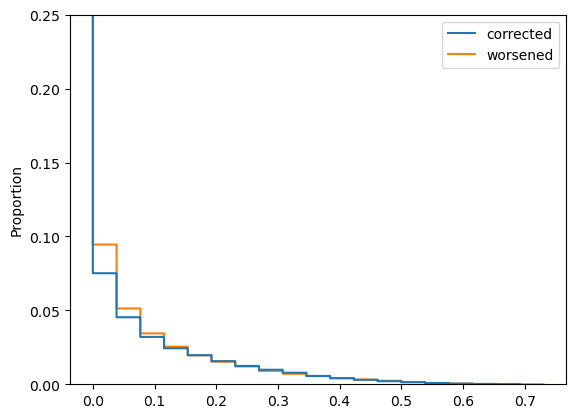

In [71]:
ax = sns.ecdfplot(data=pert_test_results[["corrected", "worsened"]], complementary=True)
ax.set(ylim=(0,0.25))

In [72]:
pert_test_results[pert_test_results["y_outcomes"].map(len) > 2]

,y_true,y,pert_alarm,y_outcomes,changed_to,corrected,worsened
idx,,,,,,,
11078038,2,2,True,"{0, 1, 2}","{0, 1}",0.000000,0.115385
6032660,0,2,True,"{0, 1, 2}","{0, 1}",0.230769,0.000000
6791213,2,2,True,"{0, 1, 2}","{0, 1}",0.000000,0.230769
6792574,2,2,True,"{0, 1, 2}","{0, 1}",0.000000,0.076923
6792740,0,2,True,"{0, 1, 2}","{0, 1}",0.038462,0.000000
6792982,2,2,True,"{0, 1, 2}","{0, 1}",0.000000,0.115385
7876602,1,2,True,"{0, 1, 2}","{0, 1}",0.153846,0.000000
7878135,2,2,True,"{0, 1, 2}","{0, 1}",0.000000,0.461538
8283973,1,2,True,"{0, 1, 2}","{0, 1}",0.038462,0.000000


In [73]:
pert_test_results["correct"] = pert_test_results["y_true"] == pert_test_results["y"]
pert_test_results

,y_true,y,pert_alarm,y_outcomes,changed_to,corrected,worsened,correct
idx,,,,,,,,
10000852,0,1,False,{1},{},0.0,0.0,False
10001243,1,1,False,{1},{},0.0,0.0,True
10002013,1,1,False,{1},{},0.0,0.0,True
10002279,1,1,False,{1},{},0.0,0.0,True
10002831,0,1,False,{1},{},0.0,0.0,False
...,...,...,...,...,...,...,...,...
9998419,1,1,False,{1},{},0.0,0.0,True
9998422,1,1,False,{1},{},0.0,0.0,True
9998464,1,1,False,{1},{},0.0,0.0,True


<AxesSubplot:xlabel='pert_alarm', ylabel='count'>

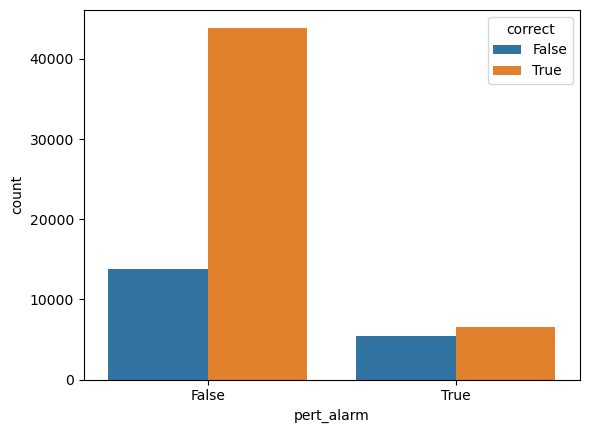

In [74]:
sns.countplot(data = pert_test_results, x="pert_alarm", hue="correct")

In [75]:
def correct_mistakes(row):
    if row.pert_alarm:
        return row.y_true
    else:
        return row.y

def force_mistakes(row):
    if row.worsened >= 0.3 and row.changed_to:
        return random.sample(row.changed_to,1)[0]
    else:
        return row.y

def force_corrections(row):
    if row.corrected >= 0.3:
        return row.y_true
    else:
        return row.y

pert_test_results["y_corrected"] = pert_test_results.apply(correct_mistakes, axis="columns")
pert_test_results["y_forced_mistake"] = pert_test_results.apply(force_mistakes, axis="columns")
pert_test_results["y_forced_correction"] = pert_test_results.apply(force_corrections, axis="columns")

C:\Users\chrig\AppData\Local\Temp\ipykernel_14976\462870279.py:9: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  return random.sample(row.changed_to,1)[0]


In [76]:
pert_test_results

,y_true,y,pert_alarm,y_outcomes,changed_to,corrected,worsened,correct,y_corrected,y_forced_mistake,y_forced_correction
idx,,,,,,,,,,,
10000852,0,1,False,{1},{},0.0,0.0,False,1,1,1
10001243,1,1,False,{1},{},0.0,0.0,True,1,1,1
10002013,1,1,False,{1},{},0.0,0.0,True,1,1,1
10002279,1,1,False,{1},{},0.0,0.0,True,1,1,1
10002831,0,1,False,{1},{},0.0,0.0,False,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
9998419,1,1,False,{1},{},0.0,0.0,True,1,1,1
9998422,1,1,False,{1},{},0.0,0.0,True,1,1,1
9998464,1,1,False,{1},{},0.0,0.0,True,1,1,1


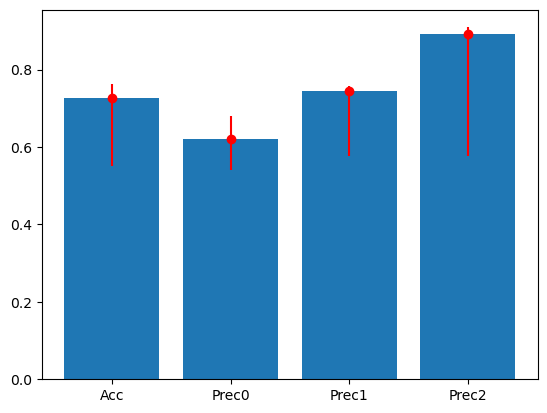

In [77]:
y_errormin = [alarm.get("acc"), alarm.get("prec0"), alarm.get("prec1"), alarm.get("prec2")]
y_errormax = [no_alarm.get("acc"), no_alarm.get("prec0"), no_alarm.get("prec1"), no_alarm.get("prec2")]
y_error = [y_errormin, y_errormax]
y = [real.get("acc"), real.get("prec0"), real.get("prec1"), real.get("prec2")]
for c, v in enumerate(y_errormin):
    y_errormin[c] = y[c] - v
for c, v in enumerate(y_errormax):
    y_errormax[c] = v - y[c]
x = ["Acc", "Prec0", "Prec1", "Prec2"]
plt.bar(x,y)
plt.errorbar(x,y, yerr=y_error, fmt='o', color="r")
plt.show()

In [78]:
print(f"Real values {real}")
print(f"Alarmed values {alarm}")
print(f"Non-alarmed values {no_alarm}")

Real values {'acc': 0.725182397885908, 'prec0': 0.6193528999298809, 'prec1': 0.7450938414329551, 'prec2': 0.8925619834710744}
Alarmed values {'acc': 0.549507430288863, 'prec0': 0.5394721677999309, 'prec1': 0.5759233926128591, 'prec2': 0.5755968169761273}
Non-alarmed values {'acc': 0.7616825672159584, 'prec0': 0.6807511737089202, 'prec1': 0.757739997443436, 'prec2': 0.90905327077008}


In [79]:
# Scores when all alerted entries are corrected
print_measures(list(pert_test_results["y_corrected"]), list(pert_test_results["y_true"]), [0,1,2])

--------------------
Global measures
Number of entries: 69628
Accuracy: 0.80268
Precision-µ: 0.80268
Recall-µ: 0.80268
F1-Score-µ: 0.80268
=
Precision-M: 0.83069
Recall-M: 0.76702
F1-Score-M: 0.79305
--------------------
Measures for label '0'
Number of entries: 20752
Precision score: 0.78867
Recall score: 0.64813
--------------------
Measures for label '1'
Number of entries: 39565
Precision score: 0.78871
Recall score: 0.89405
--------------------
Measures for label '2'
Number of entries: 9311
Precision score: 0.91469
Recall score: 0.75889


{'acc': 0.8026799563394037,
 'prec0': 0.7886712794652281,
 'prec1': 0.7887132377533501,
 'prec2': 0.9146925566343042}

In [80]:
# Scores when all alerted entries discarded
print_measures(list(pert_test_results[pert_test_results["pert_alarm"] == False]["y"]), list(pert_test_results[pert_test_results["pert_alarm"] == False]["y_true"]), [0,1,2])

--------------------
Global measures
Number of entries: 57650
Accuracy: 0.76168
Precision-µ: 0.76168
Recall-µ: 0.76168
F1-Score-µ: 0.76168
=
Precision-M: 0.78251
Recall-M: 0.71156
F1-Score-M: 0.73898
--------------------
Measures for label '0'
Number of entries: 14987
Precision score: 0.68075
Recall score: 0.51278
--------------------
Measures for label '1'
Number of entries: 33831
Precision score: 0.75774
Recall score: 0.87609
--------------------
Measures for label '2'
Number of entries: 8832
Precision score: 0.90905
Recall score: 0.74581


{'acc': 0.7616825672159584,
 'prec0': 0.6807511737089202,
 'prec1': 0.757739997443436,
 'prec2': 0.90905327077008}

In [81]:
#Scores when all strongly changed perturbations are corrected
print_measures(list(pert_test_results["y_forced_correction"]), list(pert_test_results["y_true"]), [0,1,2])

--------------------
Global measures
Number of entries: 69628
Accuracy: 0.73501
Precision-µ: 0.73501
Recall-µ: 0.73501
F1-Score-µ: 0.73501
=
Precision-M: 0.76206
Recall-M: 0.71267
F1-Score-M: 0.73401
--------------------
Measures for label '0'
Number of entries: 20752
Precision score: 0.63871
Recall score: 0.59888
--------------------
Measures for label '1'
Number of entries: 39565
Precision score: 0.75004
Recall score: 0.80710
--------------------
Measures for label '2'
Number of entries: 9311
Precision score: 0.89743
Recall score: 0.73204


{'acc': 0.7350060320560694,
 'prec0': 0.6387090142871826,
 'prec1': 0.7500411039342337,
 'prec2': 0.897432521395655}

In [82]:
#Scores when all strongly changed perturbations are changed to wrong entries
print_measures(list(pert_test_results["y_forced_mistake"]), list(pert_test_results["y_true"]), [0,1,2])

--------------------
Global measures
Number of entries: 69628
Accuracy: 0.71613
Precision-µ: 0.71613
Recall-µ: 0.71613
F1-Score-µ: 0.71613
=
Precision-M: 0.74453
Recall-M: 0.69574
F1-Score-M: 0.71680
--------------------
Measures for label '0'
Number of entries: 20752
Precision score: 0.60695
Recall score: 0.57170
--------------------
Measures for label '1'
Number of entries: 39565
Precision score: 0.73506
Recall score: 0.78959
--------------------
Measures for label '2'
Number of entries: 9311
Precision score: 0.89157
Recall score: 0.72592


{'acc': 0.7161343137818119,
 'prec0': 0.6069473576507904,
 'prec1': 0.7350588235294118,
 'prec2': 0.8915710328452711}